In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans

In [2]:
from sklearn.datasets import make_blobs
X, _ = make_blobs(n_samples=100, n_features=2, centers=4, cluster_std=0.5, shuffle=True, random_state=0)

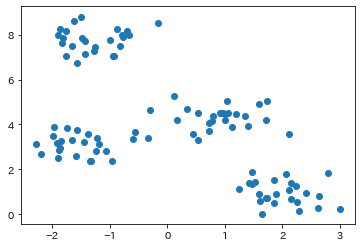

In [3]:
plt.scatter(X[:,0], X[:, 1])

In [4]:
class ScratchKMeans():
    """
    K-meansのスクラッチ実装

    Parameters
    ----------
    n_clusters : int
      クラスタ数
    n_init : int
      中心点の初期値を何回変えて計算するか
    max_iter : int
      1回の計算で最大何イテレーションするか
    tol : float
      イテレーションを終了する基準となる中心点と重心の許容誤差
    verbose : bool
      学習過程を出力する場合はTrue
    """
    def __init__(self, n_clusters, n_init, max_iter, tol, verbose=False):
        # ハイパーパラメータを属性として記録
        self.n_clusters = n_clusters
        self.n_init = n_init
        self.max_iter = max_iter
        self.tol = tol
        self.verbose = verbose
    def fit(self, X):
        """
        K-meansによるクラスタリングを計算
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            訓練データの特徴量
        """
        centroids_list = []
        sse_list = []
        for i in range(self.n_init):
            centroids = self._select_init_centroids(X)
            for j in range(self.max_iter):
                labels = self._assign_to_cluster(X, centroids)
                previous_centroids = centroids.copy()
                centroids = self._update_centroids(X, labels)
                if np.linalg.norm(centroids - previous_centroids, ord=2) < self.tol:
                    break
            centroids_list.append(centroids)
            sse = self._compute_sse(X, centroids, labels)
            sse_list.append(sse)
            if self.verbose:
                print(centroids)
        min_index = np.argmin(sse_list)
        self.best_centroids = centroids_list[min_index]
        self.best_sse = min(sse_list)
        
        return self.best_centroids
        
    def predict(self, X):
        """
        入力されたデータがどのクラスタに属するかを計算
        """
        labels = self._assign_to_cluster(X, self.best_centroids)
        
        return labels
    
    def _select_init_centroids(self, X):
        init_centroids_index = np.random.choice(X.shape[0], self.n_clusters)
        init_centroids = X[init_centroids_index]
        
        return init_centroids
    
    def _compute_sse(self, X, centroids, labels):
        sse = 0
        for i in range(X.shape[0]):
            sse += np.sum((X[i] - centroids[int(labels[i])])**2)

        return sse
    
    def _assign_to_cluster(self, X, centroids):
        labels = np.zeros(X.shape[0])
        for i, X_row in enumerate(X):
            norm_list = []
            for centroid_row in centroids:
                norm_list.append(np.linalg.norm(X_row - centroid_row, ord=2))
            cluster_index = np.argmin(norm_list)
            labels[i] = cluster_index
            
        return labels
    
    def _update_centroids(self, X, labels):
        centroids = np.zeros([self.n_clusters, X.shape[1]])
        for i, label in enumerate(np.unique(labels)):
            centroids[i] = np.mean(X[labels==label], axis=0)
        
        return centroids

# 【問題1】中心点の初期値を決める

class ScratchKMeans()に下記コードを追加
```python
def select_init_centroids(self, X):
    init_centroids_index = np.random.choice(X.shape[0], self.n_clusters)
    init_centroids = X[init_centroids_index]

    return init_centroids
```

# 【問題2】SSEを求める関数の作成

class ScratchKMeans()に下記コードを追加
```python
def _compute_sse(self, X, centroids, labels):
    sse = 0
    for i in range(X.shape[0]):
        sse += np.sum((X[i] - centroids[int(labels[i])])**2)

    return sse
```

# 【問題3】クラスタへの割り当て

class ScratchKMeans()に下記コードを追加
```python
def assign_to_cluster(self, X, centroids):
    labels = np.zeros(X.shape[0])
    for i, X_row in enumerate(X):
        norm_list = []
        for centroid_row in centroids:
            norm_list.append(np.linalog.norm(X_row - centroid_row, ord=2))
        cluster_index = np.argmin(norm_list)
        labels[i] = cluster_index

    return labels
```

# 【問題4】中心点の移動

class ScratchKMeans()に下記コードを追加
```python
def _update_centroids(self, X, labels):
    centroids = np.zeros([self.n_clusters, X.shape[1]])
    for i, label in enumerate(np.unique(labels)):
        centroids[i] = np.mean(X[labels==label], axis=0)

    return centroids
```

# 【問題5】繰り返し、【問題6】異なる初期値で計算

class ScratchKMeans()に下記コードを追加
```python
def fit(self, X):
    """
    K-meansによるクラスタリングを計算
    Parameters
    ----------
    X : 次の形のndarray, shape (n_samples, n_features)
        訓練データの特徴量
    """
    centroids_list = []
    sse_list = []
    for i in range(self.n_init):
        centroids = self._select_init_centroids(X)
        for j in range(self.max_iter):
            labels = self._assign_to_cluster(X, centroids)
            previous_centroids = centroids.copy()
            centroids = self._update_centroids(X, labels)
            if np.linalg.norm(centroids - previous_centroids, ord=2) < self.tol:
                break
        centroids_list.append(centroids)
        sse = self._compute_sse(X, centroids, labels)
        sse_list.append(sse)
        if self.verbose:
            print(centroids)
    min_index = np.argmin(sse_list)
    self.best_centroids = centroids_list[min_index]
    self.best_sse = min(ssel_list)

    return self.best_centroids
```

# 【問題7】推定

class ScratchKMeans()に下記コードを追加
```python
def predict(self, X):
    """
    入力されたデータがどのクラスタに属するかを計算
    """
    labels = self._assign_to_cluster(X, self.best_centroids)

    return labels
```

In [5]:
scr_kmeans = ScratchKMeans(4, 10, 300, 0.0001)

In [6]:
scr_kmeans.fit(X)

array([[ 0.92578447,  4.32475792],
       [ 1.99186903,  0.96561071],
       [-1.47935679,  3.11716896],
       [-1.26811733,  7.76378266]])

In [7]:
labels = scr_kmeans.predict(X)

In [8]:
X_0 = X[labels==0]
X_1 = X[labels==1]
X_2 = X[labels==2]
X_3 = X[labels==3]

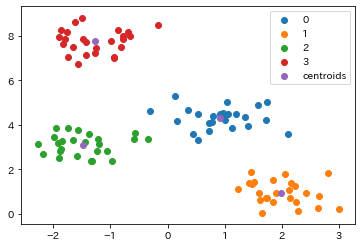

In [9]:
plt.scatter(X_0[:, 0], X_0[:, 1], label=0)
plt.scatter(X_1[:, 0], X_1[:, 1], label=1)
plt.scatter(X_2[:, 0], X_2[:, 1], label=2)
plt.scatter(X_3[:, 0], X_3[:, 1], label=3)
plt.scatter(scr_kmeans.best_centroids[:, 0], scr_kmeans.best_centroids[:, 1], label='centroids')
plt.legend()

## sklearnのkmeansで処理

In [10]:
kmeans = KMeans(n_clusters=4)

In [11]:
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

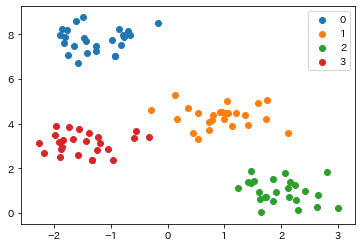

In [12]:
labels_sklearn = kmeans.predict(X)
X_0 = X[labels_sklearn==0]
X_1 = X[labels_sklearn==1]
X_2 = X[labels_sklearn==2]
X_3 = X[labels_sklearn==3]
plt.scatter(X_0[:, 0], X_0[:, 1], label=0)
plt.scatter(X_1[:, 0], X_1[:, 1], label=1)
plt.scatter(X_2[:, 0], X_2[:, 1], label=2)
plt.scatter(X_3[:, 0], X_3[:, 1], label=3)
plt.legend()

# 【問題8】エルボー法の実装

In [13]:
def select_best_n_clusters(X, n_clusters):
    sse_list = []
    for i in range(2, n_clusters):
        scr_kmeans = ScratchKMeans(i, 10, 300, 0.0001)
        scr_kmeans.fit(X)
        sse_list.append(scr_kmeans.best_sse)
    index = list(range(2, n_clusters))
    plt.plot(index, sse_list)
    plt.xlabel('n_clusters')
    plt.ylabel('SSE')
    plt.show()

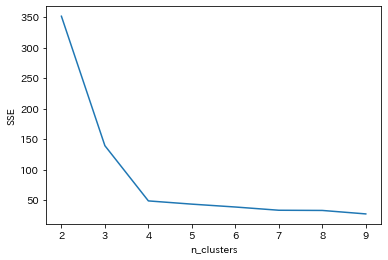

In [14]:
select_best_n_clusters(X, 10)

# 【問題9】（アドバンス課題）シルエット図

In [15]:
scr_kmeans.predict(X)

array([0., 3., 0., 0., 0., 0., 2., 3., 0., 3., 3., 3., 3., 3., 3., 1., 1.,
       2., 2., 1., 0., 3., 2., 1., 0., 2., 2., 0., 1., 1., 1., 3., 1., 1.,
       2., 0., 3., 1., 3., 2., 0., 2., 3., 2., 2., 3., 1., 2., 0., 0., 0.,
       1., 2., 2., 2., 3., 3., 1., 1., 3., 3., 1., 1., 0., 1., 3., 2., 2.,
       1., 0., 3., 1., 0., 3., 0., 0., 2., 2., 1., 1., 1., 3., 2., 0., 1.,
       2., 1., 1., 0., 0., 0., 2., 0., 2., 2., 3., 3., 2., 3., 0.])

In [16]:
labels = scr_kmeans.predict(X)
silhouette_vals = np.zeros(X.shape[0])
for i, X_row in enumerate(X):
    an = np.linalg.norm(X[labels==labels[i]] - X_row, ord=2)/(len(labels==labels[i]) - 1)
    distance_list = []
    for best_centroid in scr_kmeans.best_centroids:
        distance_to_centroid = np.linalg.norm(best_centroid - X_row)
        distance_list.append(distance_to_centroid)
    centroid_second_index = sorted(list(enumerate(distance_list)), key=lambda x: x[1])[1][0]
    bn = np.linalg.norm(X[labels==labels[centroid_second_index]] - X_row, ord=2)/len(labels==labels[centroid_second_index])
    silhouette_vals[i] = (bn - an)/max(bn, an)
    print(an, bn)
silhouette_avg = np.mean(silhouette_vals)
y_km = labels
cluster_labels = list(range(scr_kmeans.n_clusters))
n_clusters = scr_kmeans.n_clusters

0.04027869790028381 0.03987591092128097
0.0404141097797018 0.2318824455815939
0.0351152456576718 0.03476409320109509
0.02830081280224266 0.028017804674220232
0.051202055733729324 0.05069003517639203
0.028497473561626907 0.028212498826010637
0.05080204156562186 0.14838547726630005
0.03547317093095191 0.19860071187951273
0.06835209952928932 0.06766857853399642
0.027543853569141425 0.20814865019433818
0.048046363734331306 0.16588404434029577
0.05054712743555941 0.19320108264864216
0.037076363955282104 0.1847207517492756
0.02805643586410479 0.19778470685673533
0.03475193659626964 0.18338549470679863
0.06860432991833182 0.23110543670839256
0.059606668246939276 0.1280695963580389
0.064524468983987 0.08241655960113907
0.03307988316218452 0.15799585661871074
0.05458934974776061 0.22077241722237606
0.0759364298425884 0.27008148305159146
0.037960512219947354 0.2159944836310613
0.033343262718428746 0.15507409189336288
0.05259670445871505 0.22192399373664384
0.03532694189239982 0.03497367247347582

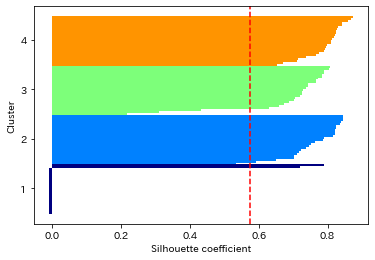

In [17]:
from matplotlib import cm
y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(i / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, edgecolor='none', color=color)
    yticks.append((y_ax_lower + y_ax_upper) / 2)
    y_ax_lower += len(c_silhouette_vals)
plt.axvline(silhouette_avg, color="red", linestyle="--")
cluster_labels_plus1 = []
for cluster_label in cluster_labels:
    cluster_labels_plus1.append(cluster_label + 1)
plt.yticks(yticks, cluster_labels_plus1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')
plt.show()

In [18]:
df = pd.read_csv('POS_CASH_balance.csv')

In [19]:
df

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125


In [20]:
data = df.drop(['Channel', 'Region'], axis=1)

In [21]:
data

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...
435,29703,12051,16027,13135,182,2204
436,39228,1431,764,4510,93,2346
437,14531,15488,30243,437,14841,1867
438,10290,1981,2232,1038,168,2125


In [22]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
pca = pca.fit(data)
data_pca = pca.transform(data)

In [23]:
data_pca

array([[ 6.50022122e+02,  1.58551909e+03],
       [-4.42680498e+03,  4.04245151e+03],
       [-4.84199871e+03,  2.57876218e+03],
       [ 9.90346437e+02, -6.27980600e+03],
       [ 1.06579987e+04, -2.15972582e+03],
       [-2.76596159e+03, -9.59870727e+02],
       [-7.15550892e+02, -2.01300227e+03],
       [-4.47458367e+03,  1.42949697e+03],
       [-6.71209540e+03, -2.20590916e+03],
       [-4.82363435e+03,  1.34805592e+04],
       [-7.97482898e+03,  5.71121893e+03],
       [ 3.63937790e+01, -6.03789641e+03],
       [ 1.99402021e+04,  4.59128648e+03],
       [ 9.39669558e+03,  5.91315704e+03],
       [ 1.26603704e+04,  4.54194543e+03],
       [-2.99772590e+03, -6.09387930e+03],
       [-1.05895236e+04,  6.58421594e+03],
       [-6.36709518e+03, -3.68071267e+03],
       [ 6.62382534e+03,  1.25471953e+03],
       [-4.86153157e+03, -2.25592266e+02],
       [ 4.79424416e+03, -3.98879936e+03],
       [-7.24486684e+03, -7.34772325e+03],
       [ 1.92992657e+04, -6.93681068e+03],
       [ 1.

[0.45961362 0.86478588 0.93481597 0.97883941 0.99386152 1.        ]


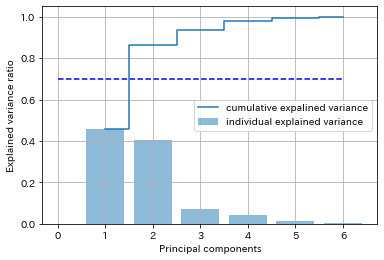

In [24]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
pca = PCA(n_components=None)
pca = pca.fit(data)
var_exp = pca.explained_variance_ratio_
cum_var_exp = np.cumsum(var_exp)
print(cum_var_exp)
plt.bar(range(1,7), var_exp, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(1,7), cum_var_exp, where='mid', label='cumulative expalined variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.hlines(0.7, 0, 6,  "blue", linestyles='dashed')
plt.legend(loc='best')
plt.grid()
plt.show()

In [25]:
pca.components_

array([[ 0.97653685,  0.12118407,  0.06154039,  0.15236462, -0.00705417,
         0.06810471],
       [-0.11061386,  0.51580216,  0.76460638, -0.01872345,  0.36535076,
         0.05707921],
       [-0.17855726,  0.50988675, -0.27578088,  0.71420037, -0.20440987,
         0.28321747],
       [ 0.04187648,  0.64564047, -0.37546049, -0.64629232, -0.14938013,
         0.02039579],
       [-0.015986  , -0.20323566,  0.1602915 , -0.22018612, -0.20793016,
         0.91707659],
       [-0.01576316,  0.03349187,  0.41093894, -0.01328898, -0.87128428,
        -0.26541687]])

# 【問題10】クラスタ数kの選択

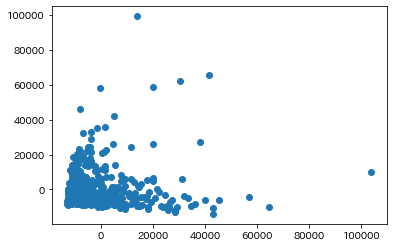

In [26]:
plt.scatter(data_pca[:, 0], data_pca[:, 1])

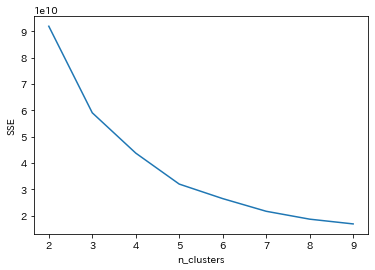

In [27]:
select_best_n_clusters(data_pca, 10)

## エルボー法よりクラスター数を5で分類する

# 【問題11】既知のグループとの比較

In [28]:
df.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


## kmeansによる分類

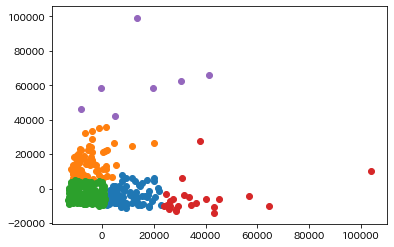

In [29]:
scr_kmeans = ScratchKMeans(5, 10, 300, 0.0001)
scr_kmeans.fit(data_pca)
labels = scr_kmeans.predict(data_pca)
for i in range(7):
    plt.scatter(data_pca[labels==i][:, 0], data_pca[labels==i][:, 1])

## channelによる分類

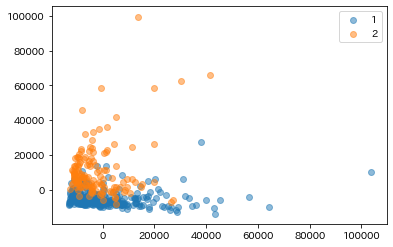

In [30]:
for channel in np.unique(df.Channel):
    plt.scatter(data_pca[df.Channel==channel][:, 0], data_pca[df.Channel==channel][:, 1], alpha=0.5, label=channel)
    plt.legend()

## regionによる分類

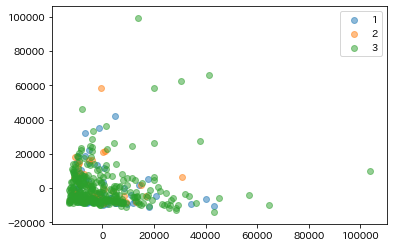

In [31]:
for region in np.unique(df.Region):
    plt.scatter(data_pca[df.Region==region][:, 0], data_pca[df.Region==region][:, 1], alpha=0.5, label=region)
    plt.legend()

## channelとregionによる分類

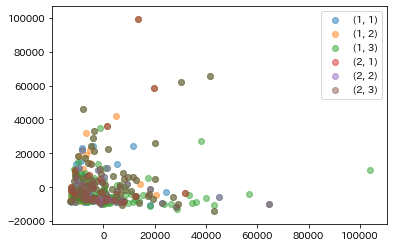

In [32]:
for channel in np.unique(df.Channel):
    for region in np.unique(df.Region):
        data_tmp = df[df.Channel==channel]
        plt.scatter(data_pca[np.where(data_tmp.Region==region)[0]][:, 0], 
                    data_pca[np.where(data_tmp.Region==region)[0]][:, 1], alpha=0.5, label=(channel, region))
        plt.legend()

## channelとregionによる分類とクラスター数を合わせるためクラスター数を６にして分類する

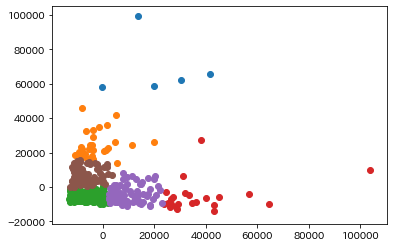

In [33]:
scr_kmeans = ScratchKMeans(6, 10, 300, 0.0001)
scr_kmeans.fit(data_pca)
labels = scr_kmeans.predict(data_pca)
for i in range(7):
    plt.scatter(data_pca[labels==i][:, 0], data_pca[labels==i][:, 1])

## channelとregionによる6分類とkmeansによる6分類の相関係数を調べる

In [34]:
labels_channel_region = np.zeros(len(df))
label_number = 0
for channel in np.unique(df.Channel):
    for region in np.unique(df.Region):
        df_tmp = df[df.Channel==channel]
        labels_channel_region[[np.where(df_tmp.Region==region)[0]]] = label_number
        label_number += 1

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  


In [35]:
np.corrcoef(labels, labels_channel_region)

array([[1.        , 0.00364764],
       [0.00364764, 1.        ]])

## channelとregionによる6分類とkmeansによる6分類の相関係数が-0.00809603と低く、関係がなさそう。channel毎の購入金額には差がありそうだが、regionによる差はなさそう。

# 【問題12】卸売業者にとって有益な情報

In [36]:
df['cluster'] = labels

In [37]:
a = df.groupby('cluster').mean()

In [38]:
a

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
cluster,,,,,,,,
0.0,2.000000,2.800000,25603.000000,43460.600000,61472.200000,2636.000000,29974.200000,2708.800000
1.0,2.000000,2.433333,6683.066667,17468.033333,26658.933333,1986.300000,11872.900000,2531.200000
2.0,1.068421,2.500000,6640.400000,2431.000000,3055.078947,2655.515789,727.921053,876.915789
3.0,1.086957,2.695652,49330.739130,6823.260870,6338.521739,9666.086957,950.913043,4557.695652
4.0,1.212121,2.565657,21749.151515,4014.252525,5294.828283,4276.303030,1158.161616,1752.606061
5.0,1.763441,2.591398,4324.462366,8524.483871,12268.752688,1383.430108,5236.182796,1467.892473


In [39]:
display(df[df.cluster==0].describe())
display(df[df.cluster==1].describe())
display(df[df.cluster==2].describe())
display(df[df.cluster==3].describe())
display(df[df.cluster==4].describe())
display(df[df.cluster==5].describe())

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,cluster
count,5.0,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.00000,5.0
mean,2.0,2.800000,25603.000000,43460.600000,61472.20000,2636.000000,29974.200000,2708.80000,0.0
std,0.0,0.447214,14578.726059,25164.556887,21876.69411,3100.385702,9032.283028,2243.61855,0.0
min,2.0,2.000000,8565.000000,4980.000000,32114.00000,131.000000,20070.000000,903.00000,0.0
25%,2.0,3.000000,16117.000000,38369.000000,55571.00000,987.000000,24171.000000,1215.00000,0.0
50%,2.0,3.000000,22925.000000,46197.000000,59598.00000,1026.000000,26701.000000,2017.00000,0.0
75%,2.0,3.000000,35942.000000,54259.000000,67298.00000,3254.000000,38102.000000,2944.00000,0.0
max,2.0,3.000000,44466.000000,73498.000000,92780.00000,7782.000000,40827.000000,6465.00000,0.0


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,cluster
count,30.0,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.0
mean,2.0,2.433333,6683.066667,17468.033333,26658.933333,1986.300000,11872.900000,2531.200000,1.0
std,0.0,0.817200,6460.649529,7234.472197,6451.403263,1655.895136,4889.020608,3196.441841,0.0
min,2.0,1.000000,85.000000,6964.000000,17645.000000,36.000000,836.000000,3.000000,1.0
25%,2.0,2.000000,1899.750000,12739.500000,21971.000000,807.500000,8757.250000,715.250000,1.0
50%,2.0,3.000000,5074.000000,15184.500000,25365.000000,1704.000000,12126.000000,1497.500000,1.0
75%,2.0,3.000000,9618.750000,21886.000000,28969.750000,2553.750000,14107.750000,3070.250000,1.0
max,2.0,3.000000,26373.000000,36423.000000,45828.000000,6746.000000,24231.000000,16523.000000,1.0


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,cluster
count,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.0
mean,1.068421,2.500000,6640.400000,2431.000000,3055.078947,2655.515789,727.921053,876.915789,2.0
std,0.253134,0.801784,4174.518708,1942.926517,2044.235009,3178.686461,955.873389,864.604153,0.0
min,1.000000,1.000000,3.000000,55.000000,137.000000,47.000000,3.000000,3.000000,2.0
25%,1.000000,2.000000,2860.000000,1012.000000,1563.000000,726.000000,179.750000,319.250000,2.0
50%,1.000000,3.000000,6758.500000,1897.000000,2466.000000,1456.000000,343.500000,644.500000,2.0
75%,1.000000,3.000000,9755.500000,3292.750000,4410.750000,3374.000000,855.250000,1116.250000,2.0
max,2.000000,3.000000,15218.000000,10678.000000,11593.000000,17866.000000,5316.000000,5137.000000,2.0


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,cluster
count,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.0
mean,1.086957,2.695652,49330.739130,6823.260870,6338.521739,9666.086957,950.913043,4557.695652,3.0
std,0.288104,0.702902,17314.498127,10257.626773,5418.458174,13843.053341,1075.674626,9982.798503,0.0
min,1.000000,1.000000,32717.000000,286.000000,471.000000,532.000000,20.000000,3.000000,3.0
25%,1.000000,3.000000,39453.500000,2333.500000,2366.500000,1553.000000,225.500000,870.500000,3.0
50%,1.000000,3.000000,43088.000000,3916.000000,4955.000000,5243.000000,751.000000,1824.000000,3.0
75%,1.000000,3.000000,54643.500000,4992.000000,8185.000000,9347.000000,1189.500000,2707.000000,3.0
max,2.000000,3.000000,112151.000000,43950.000000,20170.000000,60869.000000,4948.000000,47943.000000,3.0


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,cluster
count,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.0
mean,1.212121,2.565657,21749.151515,4014.252525,5294.828283,4276.303030,1158.161616,1752.606061,4.0
std,0.410891,0.758107,5301.505840,3161.820595,4119.119740,4918.869431,1416.980763,1862.070906,0.0
min,1.000000,1.000000,11314.000000,134.000000,3.000000,118.000000,3.000000,57.000000,4.0
25%,1.000000,2.000000,17555.500000,1602.500000,2254.000000,1062.500000,245.000000,651.500000,4.0
50%,1.000000,3.000000,20398.000000,3216.000000,3838.000000,2601.000000,500.000000,1215.000000,4.0
75%,1.000000,3.000000,25686.500000,5371.000000,7315.500000,5358.000000,1590.500000,2422.000000,4.0
max,2.000000,3.000000,36050.000000,16687.000000,21042.000000,35009.000000,6707.000000,14472.000000,4.0


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,cluster
count,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.0
mean,1.763441,2.591398,4324.462366,8524.483871,12268.752688,1383.430108,5236.182796,1467.892473,5.0
std,0.427273,0.755222,3822.242921,4025.708311,4114.791755,1660.106108,2744.775012,1348.349953,0.0
min,1.000000,1.000000,18.000000,1275.000000,1660.000000,25.000000,93.000000,3.000000,5.0
25%,2.000000,3.000000,1020.000000,6046.000000,9568.000000,317.000000,3537.000000,436.000000,5.0
50%,2.000000,3.000000,3097.000000,7779.000000,11522.000000,848.000000,4882.000000,1282.000000,5.0
75%,2.000000,3.000000,6202.000000,10556.000000,14886.000000,1691.000000,6818.000000,1894.000000,5.0
max,2.000000,3.000000,15168.000000,23527.000000,22272.000000,10155.000000,17120.000000,7844.000000,5.0


## 考察
## クラスター０と１は全てchannel2に属し、「Milk」・「Grocery」・「Detergents_Paper」の３つの取扱量が特別多いので、channel2ではこれらの流通の効率化や体制強化をするとよい。また、地域はバラバラであるので、現在の取引先の周辺へのアプローチを強化することで、さらなる需要が拡大できるかもしれない。クラスター２に関しては全てのものの取扱量が少ないので、なるべく流通のコストを削減できるよう、channelの精査をすべきかもしれない。クラスター３と４に関しては、「Fresh」・「Frozen」の２つの取扱量が特別多いので冷凍状態で運搬できる設備投資が必要である。クラスター６に関しては、クラスター０の縮小版のような取扱量の比率になっているので、クラスター０の対策でよく、その周辺へのアプローチは効率が悪くなるので控えめにする。

# 【問題13】（アドバンス課題）他の手法の調査

## DBSCANのメリット・デメリット
### メリット：クラスター数を事前に決める必要がない。外れ値はノイズとしてクラスタリングされないので外れ値の影響を受けない。
### デメリット：高次元のものは扱えない。密度に大きな違いのあるデータはクラスタリングができない。距離の閾値であるεの選択が難しい。

## t-SNEのメリット・デメリット
### メリット：t分布を使うことで類似度が低いものを次元削除後も遠い関係にすることができる。
### デメリット：圧縮後の次元数は２次元か３次元でないと使うべきでない。

## LLEのメリット・デメリット
### メリット：大域的な位置関係を保存できる
### デメリット：いくつかの部分に分かれているデータを扱うことができない

# 【問題14】（アドバンス課題）t-SNEとDBSCANの利用

In [40]:
from sklearn.manifold import TSNE
from sklearn.cluster import DBSCAN

In [41]:
tsne = TSNE()

In [42]:
data_tsne = tsne.fit_transform(data)

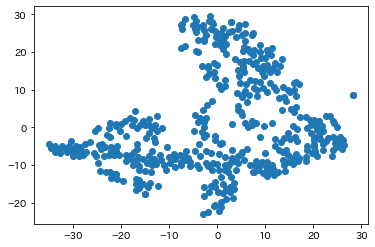

In [43]:
plt.scatter(data_tsne[:, 0], data_tsne[:, 1])

In [44]:
dbscan = DBSCAN(eps=2.4)

In [45]:
labels_dbscan = dbscan.fit_predict(data_tsne)

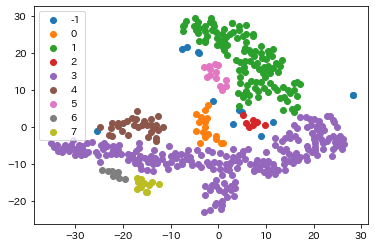

In [46]:
# t-SNEで次元削除したものをDBSCANで分類
for i in np.unique(labels_dbscan):
    plt.scatter(data_tsne[labels_dbscan==i][:, 0], data_tsne[labels_dbscan==i][:, 1], label=i)
    plt.legend()

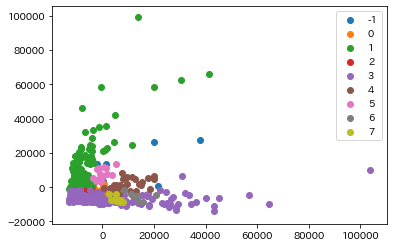

In [47]:
# 上の分類をPCAで次元削除したデータにあててみる。
for i in np.unique(labels_dbscan):
    plt.scatter(data_pca[labels_dbscan==i][:, 0], data_pca[labels_dbscan==i][:, 1], label=i)
    plt.legend()

## 次元削除の方法によって外れ値として扱うデータが変わる